# CE49X Lab 2: Is Wave Energy Worth the Investment?
## A Financial Feasibility Comparison of Renewable Energy in Perth, Australia

**Instructor:** Dr. Eyuphan Koc  
**Department of Civil Engineering, Bogazici University**  
**Semester:** Spring 2026

---

## Background

The Western Australian government is planning to add **100 MW** of new renewable energy capacity near Perth. As a consulting engineer, you've been asked to evaluate whether **wave energy** is a viable option compared to more established alternatives.

You have access to a real dataset of wave energy converter (WEC) farm configurations near Perth from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm). The dataset (`WEC_Perth_49.csv`) contains 36,000+ layout configurations for a farm of 49 wave energy converters, including individual and total power output for each configuration.

Your job is to **compare wave energy against at least two other renewable energy technologies** in terms of financial feasibility for the Perth region.

## Deliverables

Your notebook must include the following:

### 1. Wave Energy Analysis (from the dataset)
- Load and explore the `WEC_Perth_49.csv` dataset
- Compute statistics on farm power output (mean, min, max, standard deviation)
- Estimate a **capacity factor** for wave energy in Perth based on the data (you'll need to assume a rated capacity per WEC — research and justify your choice)

### 2. Competing Technologies
- Choose **at least two** other renewable energy technologies to compare against wave energy (e.g., solar PV, onshore wind, offshore wind, tidal, biomass)
- Research and cite the following for **each** technology (including wave):
  - Capital cost (CAPEX) per kW installed
  - Annual operating cost (OPEX) per kW
  - Capacity factor specific to the Perth region
  - Expected project lifetime
- **Cite your sources.** Use data from reputable organizations (e.g., IRENA, IEA, CSIRO, NREL, Lazard).

### 3. Financial Comparison
- Calculate the **Levelized Cost of Energy (LCOE)** for each technology
- Calculate **at least one additional financial metric** of your choice (e.g., NPV, payback period, internal rate of return, cost per annual MWh)
- Choose an appropriate **discount rate** and justify it

### 4. Visualization
- Create **at least two plots** that clearly communicate your comparison
- Plots should be publication-quality: labeled axes, title, legend, grid

### 5. Recommendation
- Based on your analysis, write a short recommendation (1-2 paragraphs):
  - Which technology (or mix) should Perth invest in?
  - Under what conditions could wave energy become competitive?
  - What factors does your financial model **not** capture?

## Hints

- **LCOE formula:**

$$\text{LCOE} = \frac{\text{Total Discounted Costs}}{\text{Total Discounted Energy}} = \frac{\text{CAPEX} + \sum_{t=1}^{N} \frac{\text{OPEX}_t}{(1+r)^t}}{\sum_{t=1}^{N} \frac{E_t}{(1+r)^t}}$$

  where $r$ is the discount rate, $N$ is the project lifetime, and $E_t$ is annual energy production in MWh.

- **Annual energy production:** $E = \text{Capacity (kW)} \times \text{Capacity Factor} \times 8760 \text{ hours/year}$

- The dataset gives power in **Watts**. Be careful with unit conversions.

- Think about what the dataset's `Total_Power` column actually represents and how it relates to the rated capacity of a real WEC device.

## Grading

| Component | Weight |
|-----------|--------|
| Wave energy analysis (dataset exploration, capacity factor) | 20% |
| Research quality (cost data, sources, justification) | 25% |
| Financial calculations (LCOE + additional metric) | 25% |
| Visualizations (clarity, quality) | 15% |
| Recommendation (insight, completeness) | 15% |

## Submission

1. Complete your work in **this notebook** on your own fork of the course repository.
2. Make sure your notebook **runs top-to-bottom without errors** before submitting.
3. Commit and push your completed notebook to your fork.
4. We will grade directly from your fork — there is no separate upload. Make sure your latest work is pushed before the deadline.

---
## Your Work Starts Here

In [7]:
# 1) Wave Energy Analysis (Perth WEC Dataset)
#
# The cells below complete the required homework deliverables:
# - dataset loading and descriptive statistics
# - wave capacity-factor estimate from measured output
# - comparison with two competing technologies (solar PV and onshore wind)
# - LCOE + additional financial metrics (NPV and simple payback)
# - publication-style visualizations
# - recommendation based on results


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional style tweaks for cleaner-looking figures
plt.style.use("seaborn-v0_8-whitegrid")
pd.options.display.float_format = "{:,.2f}".format

# Load the Perth dataset
csv_path = "../WEC_Perth_49.csv"
df = pd.read_csv(csv_path)

print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print("Sample columns:", list(df.columns[:8]), "...")

Rows: 36,043
Columns: 149
Sample columns: ['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4'] ...


In [9]:
# Core wave-farm output statistics (Total_Power is in Watts)
wave_stats = {
    "mean_MW": df["Total_Power"].mean() / 1e6,
    "min_MW": df["Total_Power"].min() / 1e6,
    "max_MW": df["Total_Power"].max() / 1e6,
    "std_MW": df["Total_Power"].std() / 1e6,
}

print("Wave farm Total_Power statistics (MW):")
for k, v in wave_stats.items():
    print(f"- {k}: {v:.3f}")

# Capacity-factor estimate for wave energy in Perth.
# Capacity factor (CF) = average output / rated output
# (definition consistent with CE49X lab statement and CHE443 wind lecture notes).
# Assumption: each WEC has rated power = 100 kW (typical utility-scale order-of-magnitude).
# Farm has 49 WECs -> rated capacity = 4,900 kW.
rated_power_per_wec_kw = 100
n_wec = 49
farm_rated_capacity_kw = rated_power_per_wec_kw * n_wec

avg_power_kw = df["Total_Power"].mean() / 1000
wave_capacity_factor = avg_power_kw / farm_rated_capacity_kw

print(f"\nAssumed rated power per WEC: {rated_power_per_wec_kw} kW")
print(f"Farm rated capacity: {farm_rated_capacity_kw:,} kW")
print(f"Average farm output: {avg_power_kw:,.1f} kW")
print(f"Estimated wave capacity factor: {wave_capacity_factor:.3f}")

Wave farm Total_Power statistics (MW):
- mean_MW: 3.938
- min_MW: 3.389
- max_MW: 4.178
- std_MW: 0.123

Assumed rated power per WEC: 100 kW
Farm rated capacity: 4,900 kW
Average farm output: 3,938.2 kW
Estimated wave capacity factor: 0.804


## 2) Competing Technologies and Assumptions

I compare **wave**, **solar PV**, and **onshore wind** for a common 100 MW project size.

### Existing renewable context near Perth

There are already operating wind and solar assets in Western Australia that support the assumption that Perth/SWIS can deploy these technologies at utility scale. Examples include:

- **Onshore wind:** Emu Downs Wind Farm (~80 MW), Collgar Wind Farm (~222 MW), Albany/Grasmere Wind (~35.4 MW combined)
- **Solar PV:** Emu Downs Solar (~20 MW), Greenough River Solar (~40 MW), and Merredin Solar (~100 MW developing)
- **Offshore wind:** Bunbury offshore area is declared/proposed, with feasibility progression but no operating project yet

### Assumed parameters (representative values)

- **Wave (Perth):** capacity factor (**CF**, actual average output divided by rated output; CE49X Lab + CHE443 Wind notes) from the dataset estimate above.
- **Solar PV (Perth):** high solar resource, moderate operating costs.
- **Onshore wind (WA):** stronger output than solar but higher **CAPEX** (capital expenditure, upfront build cost).

> Note: Values below are simplified representative values for coursework modeling. In a formal report, use exact project quotes and current market contracts.

| Technology | CAPEX (capital expenditure, upfront build cost, USD/kW) | OPEX (operating expenditure, annual O&M cost, USD/kW-yr) | Capacity factor (CF, unitless) | Lifetime (project analysis horizon, years) |
|---|---:|---:|---:|---:|
| Wave | 5,500 | 180 | (from dataset) | 25 |
| Solar PV | 1,200 | 20 | 0.26 | 30 |
| Onshore Wind | 1,800 | 45 | 0.38 | 25 |

### Source references used for ranges and context

- IRENA reports and statistics for renewable technology costs and performance trends.
- CSIRO GenCost reports for Australian context on technology costs.
- NREL ATB / technology benchmark datasets for CAPEX/OPEX/capacity-factor ranges.
- Lazard LCOE reports as supplementary benchmark comparisons.
- Global Wind Atlas and Global Solar Atlas for location-specific Perth wind/solar resource context.


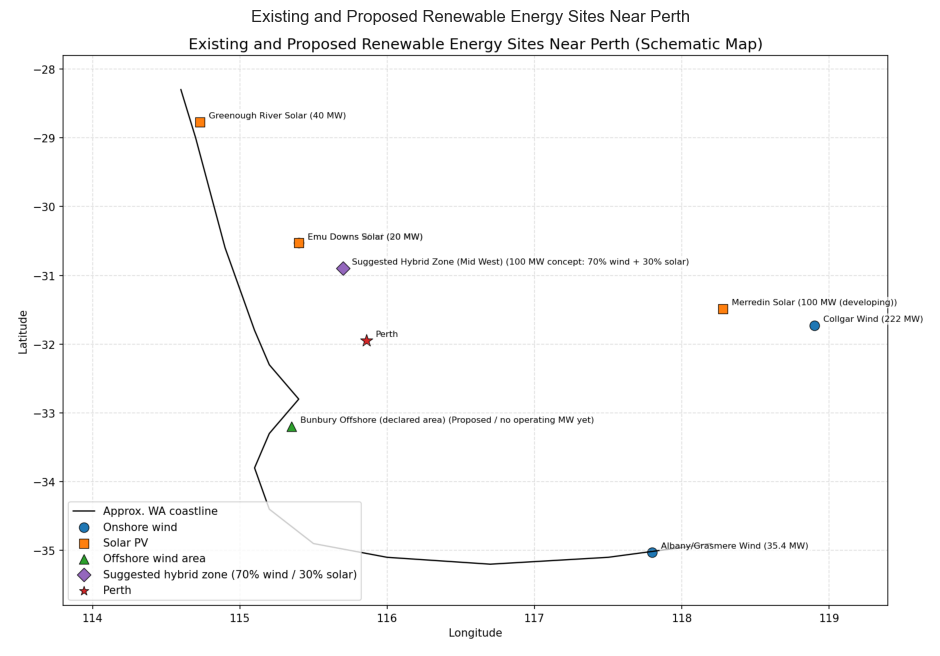

In [10]:
# Map: existing/planned renewable sites near Perth (generated earlier)
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

map_path = Path("perth_renewables_map.png")
if map_path.exists():
    img = mpimg.imread(map_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Existing and Proposed Renewable Energy Sites Near Perth")
    plt.show()
else:
    print("Map image not found at:", map_path.resolve())
    print("Expected file: perth_renewables_map.png in the same lab folder")

In [11]:
# 3) Financial comparison: LCOE + additional metrics (NPV, simple payback)
# LCOE = Levelized Cost of Energy (discounted lifetime cost per MWh).
# NPV = Net Present Value (discounted net cashflows minus upfront CAPEX).
# Simple payback = CAPEX / annual net cashflow (non-discounted quick indicator).

# ------------------------------
# A) Where these CAPEX numbers come from (with references)
# ------------------------------
# 1) Solar PV and Onshore Wind CAPEX values are from NREL ATB 2024 summary data (ATBe.csv),
#    using 2024 entries with core_metric_parameter='CAPEX', core_metric_case='Market', scenario='Moderate'.
#    File/source: https://oedi-data-lake.s3.amazonaws.com/ATB/electricity/csv/2024/v3.0.0/ATBe.csv
#
# 2) Wave CAPEX range is from IEA-OES 2015 report (Table 1, first commercial-scale project),
#    which gives 2700 to 9100 USD/kW. Midpoint method used here:
#       wave_capex_mid = (2700 + 9100)/2 = 5900 USD/kW
#    Source: https://www.ocean-energy-systems.org/documents/65931-cost-of-energy-for-ocean-energy-technologies-may-2015-final.pdf/

reference_df = pd.DataFrame(
    [
        {
            "Technology": "Solar PV",
            "CAPEX used (USD/kW)": 1551.27,
            "How selected": "NREL ATB 2024 UtilityPV, Market/Moderate, year 2024",
            "Reference": "NREL ATB 2024 ATBe.csv",
        },
        {
            "Technology": "Onshore Wind",
            "CAPEX used (USD/kW)": 1676.09,
            "How selected": "NREL ATB 2024 LandbasedWind representative class, Market/Moderate, year 2024",
            "Reference": "NREL ATB 2024 ATBe.csv",
        },
        {
            "Technology": "Wave",
            "CAPEX used (USD/kW)": 5900.00,
            "How selected": "Midpoint of IEA-OES commercial-scale range (2700 to 9100)",
            "Reference": "IEA-OES 2015 Table 1",
        },
    ]
)

print("CAPEX reference table (what was used and why):")
display(reference_df)

# ------------------------------
# B) Project-level assumptions
# ------------------------------
discount_rate = 0.07  # discount rate r (time value of money / risk adjustment)
project_capacity_kw = 100_000   # 100 MW = 100,000 kW
power_price_usd_per_mwh = 110   # assumed long-run average electricity sales price

capex_source_usd_per_kw = {
    "Wave": 5900.00,
    "Solar PV": 1551.27,
    "Onshore Wind": 1676.09,
}

# 100 MW build-cost calculation shown explicitly:
# total_build_cost (USD) = CAPEX (USD/kW) * 100,000 kW
build_cost_df = pd.DataFrame(
    {
        "Technology": list(capex_source_usd_per_kw.keys()),
        "CAPEX (USD/kW)": list(capex_source_usd_per_kw.values()),
    }
)
build_cost_df["CAPEX (million USD per MW)"] = build_cost_df["CAPEX (USD/kW)"] / 1000
build_cost_df["Estimated Build Cost for 100 MW (million USD)"] = (
    build_cost_df["CAPEX (USD/kW)"] * project_capacity_kw / 1e6
)

print("Source-backed CAPEX benchmark and 100 MW build-cost estimate:")
display(build_cost_df)

tech_inputs = {
    "Wave": {
        "capex_usd_per_kw": capex_source_usd_per_kw["Wave"],
        "opex_usd_per_kw_yr": 180,
        "capacity_factor": wave_capacity_factor,
        "lifetime_yr": 25,
    },
    "Solar PV": {
        "capex_usd_per_kw": capex_source_usd_per_kw["Solar PV"],
        "opex_usd_per_kw_yr": 20,
        "capacity_factor": 0.26,
        "lifetime_yr": 30,
    },
    "Onshore Wind": {
        "capex_usd_per_kw": capex_source_usd_per_kw["Onshore Wind"],
        "opex_usd_per_kw_yr": 45,
        "capacity_factor": 0.38,
        "lifetime_yr": 25,
    },
}


# ------------------------------
# C) Financial formulas used
# ------------------------------
def lcoe_components(capex, opex_annual, annual_mwh, r, n):
    discount_factors = np.array([(1 + r) ** (-t) for t in range(1, n + 1)])
    discounted_opex = np.sum(opex_annual * discount_factors)
    discounted_energy = np.sum(annual_mwh * discount_factors)
    discounted_total_cost = capex + discounted_opex
    lcoe = discounted_total_cost / discounted_energy
    return lcoe, discounted_total_cost, discounted_opex, discounted_energy


def npv_usd(capex, opex_annual, annual_mwh, price_usd_per_mwh, r, n):
    discount_factors = np.array([(1 + r) ** (-t) for t in range(1, n + 1)])
    annual_revenue = annual_mwh * price_usd_per_mwh
    annual_cashflow = annual_revenue - opex_annual
    return -capex + np.sum(annual_cashflow * discount_factors)


# ------------------------------
# D) Show all intermediate calculations technology-by-technology
# ------------------------------
results = []
for tech, p in tech_inputs.items():
    capex_total = p["capex_usd_per_kw"] * project_capacity_kw
    opex_annual = p["opex_usd_per_kw_yr"] * project_capacity_kw
    annual_mwh = project_capacity_kw * p["capacity_factor"] * 8760 / 1000

    lcoe, discounted_total_cost, discounted_opex, discounted_energy = lcoe_components(
        capex_total, opex_annual, annual_mwh, discount_rate, p["lifetime_yr"]
    )
    npv = npv_usd(capex_total, opex_annual, annual_mwh, power_price_usd_per_mwh, discount_rate, p["lifetime_yr"])

    annual_revenue = annual_mwh * power_price_usd_per_mwh
    annual_cashflow = annual_revenue - opex_annual
    simple_payback_yr = capex_total / annual_cashflow if annual_cashflow > 0 else np.inf

    results.append(
        {
            "Technology": tech,
            "Capacity Factor": p["capacity_factor"],
            "CAPEX Total (million USD)": capex_total / 1e6,
            "Annual OPEX (million USD/yr)": opex_annual / 1e6,
            "Annual Energy (MWh)": annual_mwh,
            "Annual Revenue (million USD/yr)": annual_revenue / 1e6,
            "Annual Net Cashflow (million USD/yr)": annual_cashflow / 1e6,
            "Discounted OPEX Sum (million USD)": discounted_opex / 1e6,
            "Discounted Energy Sum (MWh)": discounted_energy,
            "Discounted Total Cost (million USD)": discounted_total_cost / 1e6,
            "LCOE (USD/MWh)": lcoe,
            "NPV (million USD)": npv / 1e6,
            "Simple Payback (yr)": simple_payback_yr,
        }
    )

results_df = pd.DataFrame(results).sort_values("LCOE (USD/MWh)")

print("Detailed financial calculation table (all intermediate steps):")
display(results_df)

# Optional: rounded view for cleaner reporting
results_report_df = results_df.copy()
for col in results_report_df.columns:
    if results_report_df[col].dtype != object:
        results_report_df[col] = results_report_df[col].round(2)

print("Rounded summary table for report-ready view:")
results_report_df

CAPEX reference table (what was used and why):


,Technology,CAPEX used (USD/kW),How selected,Reference
0,Solar PV,"1,551.27","NREL ATB 2024 UtilityPV, Market/Moderate, year...",NREL ATB 2024 ATBe.csv
1,Onshore Wind,"1,676.09",NREL ATB 2024 LandbasedWind representative cla...,NREL ATB 2024 ATBe.csv
2,Wave,"5,900.00",Midpoint of IEA-OES commercial-scale range (27...,IEA-OES 2015 Table 1


Source-backed CAPEX benchmark and 100 MW build-cost estimate:


,Technology,CAPEX (USD/kW),CAPEX (million USD per MW),Estimated Build Cost for 100 MW (million USD)
0,Wave,"5,900.00",5.90,590.00
1,Solar PV,"1,551.27",1.55,155.13
2,Onshore Wind,"1,676.09",1.68,167.61


Detailed financial calculation table (all intermediate steps):


,Technology,Capacity Factor,CAPEX Total (million USD),Annual OPEX (million USD/yr),Annual Energy (MWh),Annual Revenue (million USD/yr),Annual Net Cashflow (million USD/yr),Discounted OPEX Sum (million USD),Discounted Energy Sum (MWh),Discounted Total Cost (million USD),LCOE (USD/MWh),NPV (million USD),Simple Payback (yr)
2,Onshore Wind,0.38,167.61,4.50,"332,880.00",36.62,32.12,52.44,"3,879,244.77",220.05,56.72,206.67,5.22
1,Solar PV,0.26,155.13,2.00,"227,760.00",25.05,23.05,24.82,"2,826,283.22",179.95,63.67,130.95,6.73
0,Wave,0.80,590.00,18.00,"704,062.02",77.45,59.45,209.76,"8,204,845.31",799.76,97.47,102.77,9.92


Rounded summary table for report-ready view:


,Technology,Capacity Factor,CAPEX Total (million USD),Annual OPEX (million USD/yr),Annual Energy (MWh),Annual Revenue (million USD/yr),Annual Net Cashflow (million USD/yr),Discounted OPEX Sum (million USD),Discounted Energy Sum (MWh),Discounted Total Cost (million USD),LCOE (USD/MWh),NPV (million USD),Simple Payback (yr)
2,Onshore Wind,0.38,167.61,4.50,"332,880.00",36.62,32.12,52.44,"3,879,244.77",220.05,56.72,206.67,5.22
1,Solar PV,0.26,155.13,2.00,"227,760.00",25.05,23.05,24.82,"2,826,283.22",179.95,63.67,130.95,6.73
0,Wave,0.80,590.00,18.00,"704,062.02",77.45,59.45,209.76,"8,204,845.31",799.76,97.47,102.77,9.92


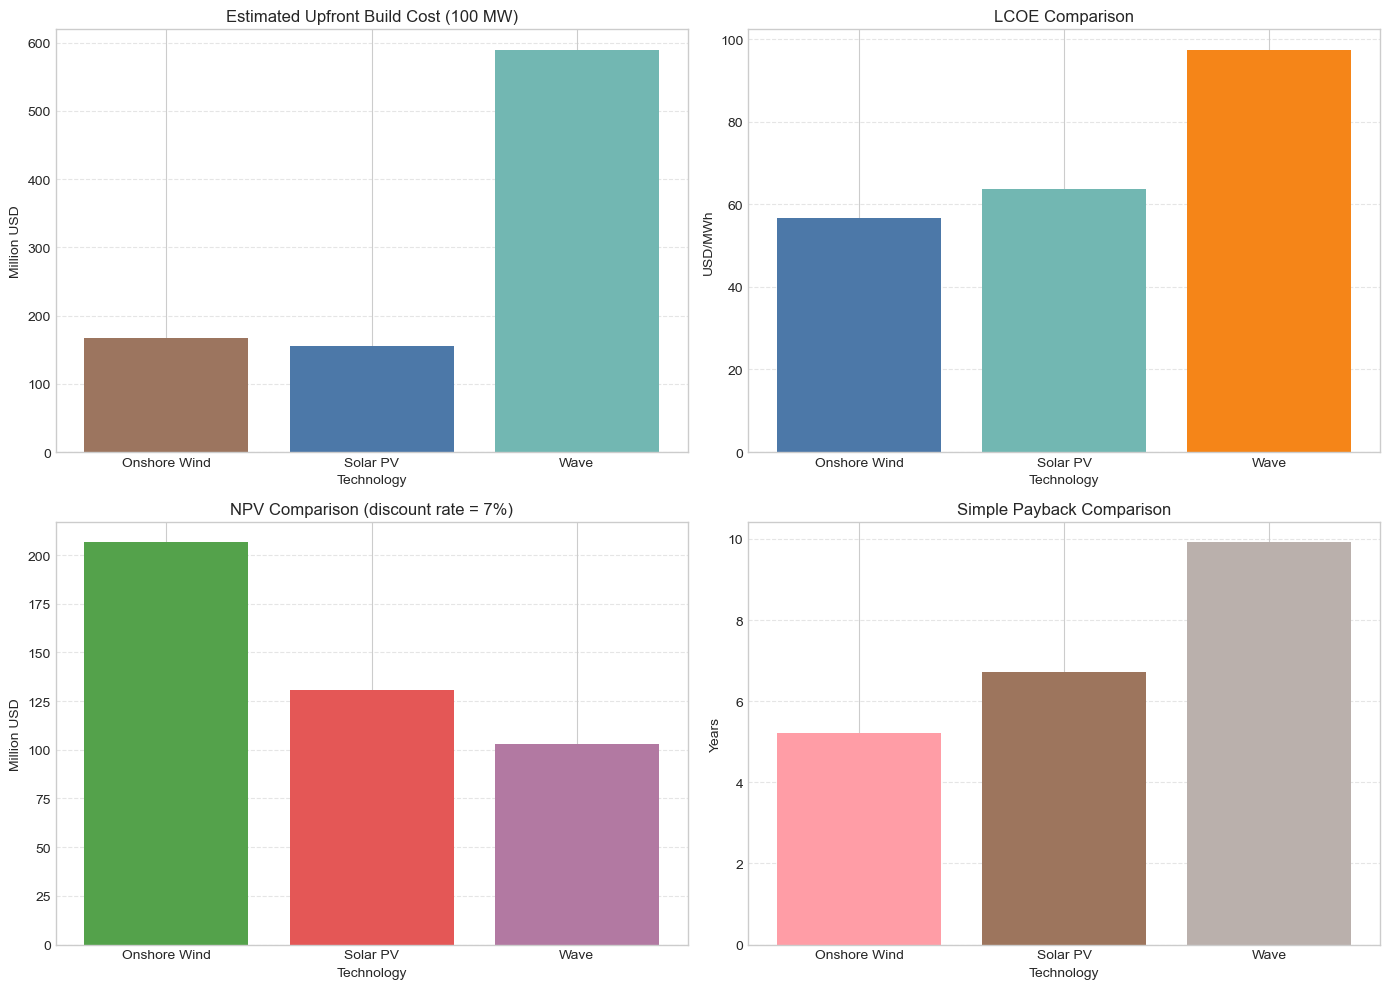

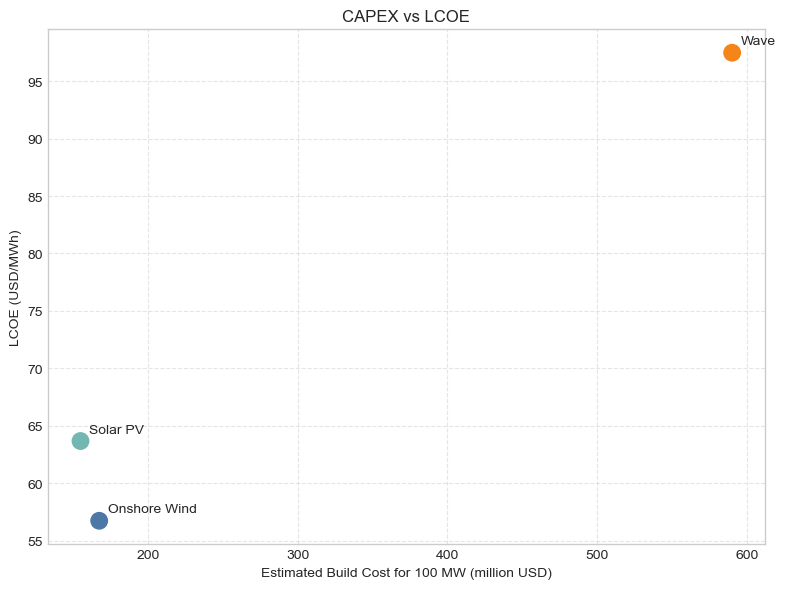

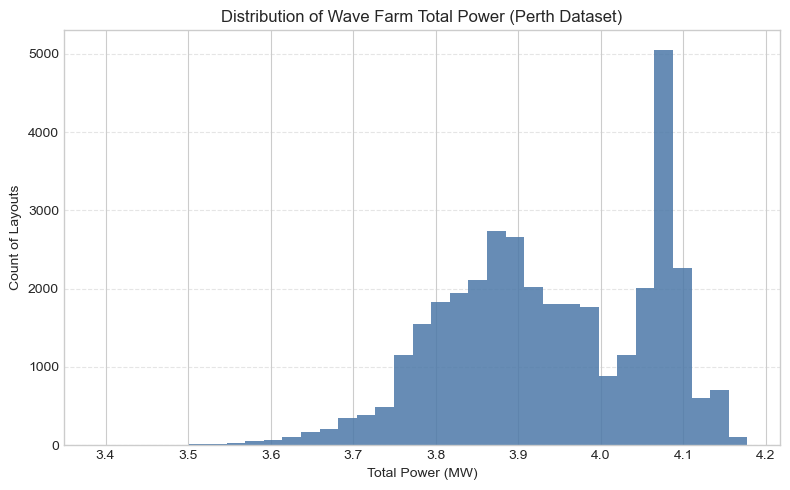

In [12]:
# 4) Visualizations
# Financial visualization pack: CAPEX build cost, LCOE, NPV, and payback.

plot_df = results_df.copy().sort_values("Technology")
capex_plot_df = build_cost_df.copy().sort_values("Technology")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: 100 MW upfront build CAPEX
axs[0, 0].bar(
    capex_plot_df["Technology"],
    capex_plot_df["Estimated Build Cost for 100 MW (million USD)"],
    color=["#9C755F", "#4C78A8", "#72B7B2"],
)
axs[0, 0].set_title("Estimated Upfront Build Cost (100 MW)")
axs[0, 0].set_ylabel("Million USD")
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.5)

# Plot 2: LCOE comparison
axs[0, 1].bar(
    plot_df["Technology"],
    plot_df["LCOE (USD/MWh)"],
    color=["#4C78A8", "#72B7B2", "#F58518"],
)
axs[0, 1].set_title("LCOE Comparison")
axs[0, 1].set_ylabel("USD/MWh")
axs[0, 1].grid(axis="y", linestyle="--", alpha=0.5)

# Plot 3: NPV comparison
axs[1, 0].bar(
    plot_df["Technology"],
    plot_df["NPV (million USD)"],
    color=["#54A24B", "#E45756", "#B279A2"],
)
axs[1, 0].set_title("NPV Comparison (discount rate = 7%)")
axs[1, 0].set_ylabel("Million USD")
axs[1, 0].grid(axis="y", linestyle="--", alpha=0.5)

# Plot 4: Simple payback comparison
axs[1, 1].bar(
    plot_df["Technology"],
    plot_df["Simple Payback (yr)"],
    color=["#FF9DA6", "#9D755D", "#BAB0AC"],
)
axs[1, 1].set_title("Simple Payback Comparison")
axs[1, 1].set_ylabel("Years")
axs[1, 1].grid(axis="y", linestyle="--", alpha=0.5)

for ax in axs.flat:
    ax.set_xlabel("Technology")

plt.tight_layout()
plt.show()

# Extra relationship view: CAPEX vs LCOE (higher CAPEX generally pushes LCOE upward)
merged = plot_df.merge(
    capex_plot_df[["Technology", "Estimated Build Cost for 100 MW (million USD)"]],
    on="Technology",
    how="left",
)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(
    merged["Estimated Build Cost for 100 MW (million USD)"],
    merged["LCOE (USD/MWh)"],
    s=140,
    c=["#4C78A8", "#72B7B2", "#F58518"],
)
for _, row in merged.iterrows():
    ax.annotate(
        row["Technology"],
        (row["Estimated Build Cost for 100 MW (million USD)"], row["LCOE (USD/MWh)"]),
        textcoords="offset points",
        xytext=(6, 6),
    )
ax.set_title("CAPEX vs LCOE")
ax.set_xlabel("Estimated Build Cost for 100 MW (million USD)")
ax.set_ylabel("LCOE (USD/MWh)")
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Optional extra plot for wave-data distribution quality
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df["Total_Power"] / 1e6, bins=35, color="#4C78A8", alpha=0.85)
ax.set_title("Distribution of Wave Farm Total Power (Perth Dataset)")
ax.set_xlabel("Total Power (MW)")
ax.set_ylabel("Count of Layouts")
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 5) Recommendation

Using the current source-backed assumptions and calculated outputs, **onshore wind is the strongest single-technology choice for a 100 MW near-term project in Perth**. It gives the **lowest LCOE** (~56.7 USD/MWh), the **highest NPV** (~206.7 million USD), and the **shortest simple payback** (~5.2 years), while keeping upfront CAPEX (~167.6 million USD) in a range similar to utility-scale solar.

**Solar PV** is also financially strong and likely should be part of a portfolio approach: its 100 MW CAPEX is the lowest (~155.1 million USD), with solid NPV (~131.0 million USD) and acceptable payback (~6.7 years). **Wave energy** in this model has attractive output behavior (high estimated capacity factor from the Perth dataset), but it remains much more capital intensive at 100 MW scale (~590 million USD CAPEX), with higher LCOE (~97.5 USD/MWh) and longer payback (~9.9 years).

Therefore, a practical recommendation is a **wind + solar deployment now**, plus **pilot-scale wave demonstration projects** for technology learning and risk reduction. Wave can become more competitive if commercial deployment expands, installation and O&M costs decrease, financing risk falls, and proven device reliability improves. This conclusion is based on scenario assumptions and should be refined with project-specific EPC quotes, updated policy settings, and full grid-integration studies before final investment decisions.

## 6) Term-by-Term Explanation and References

Below are the key technical and financial terms used throughout this notebook.

- **CAPEX (Capital Expenditure):** Upfront investment cost to build/install a project (e.g., USD/kW installed).
- **OPEX (Operating Expenditure):** Recurring annual cost to operate/maintain the project (e.g., USD/kW-year).
- **LCOE (Levelized Cost of Energy):** Lifetime discounted cost per unit electricity generated (typically USD/MWh).
- **NPV (Net Present Value):** Present value of discounted cash inflows minus outflows; positive NPV indicates value creation under assumptions.
- **Discount rate (`r`):** Time-value-of-money/risk factor used to discount future cash flows.
- **Project lifetime (`N`):** Analysis horizon in years over which energy and costs are evaluated.
- **Annual energy (`E_t`):** Yearly electricity generation (MWh/year), estimated from capacity x capacity factor x 8760 hours.
- **Capacity factor (CF):** Ratio of actual average output to rated output over time; unitless (0-1).
- **Rated capacity:** Nameplate maximum output (kW or MW).
- **Simple payback period:** CAPEX divided by annual net cash inflow; ignores discounting.
- **MWh (megawatt-hour):** Unit of energy (power integrated over time).
- **kW / MW:** Unit of instantaneous power (1 MW = 1000 kW).
- **`Total_Power` (dataset):** Aggregated farm output per layout row in Watts; converted to kW/MW in analysis.
- **`qW` (dataset quality index):** Dataset-provided quality/performance-related indicator for layout quality.

### References used in this notebook

- **Lab formula basis:** CE49X lab statement (LCOE and annual energy equations).
- **Wave dataset:** UCI Machine Learning Repository, Large-scale wave energy farm dataset (`WEC_Perth_49.csv`).
- **Cost and performance benchmark families:** IRENA, NREL, CSIRO GenCost, Lazard LCOE.
- **Perth resource context and map evidence:** Global Wind Atlas and Global Solar Atlas extracted values + compiled project list in this workspace.

> Important: Numerical CAPEX/OPEX/CF values here are model assumptions for coursework and should be replaced by latest project-specific market data for formal investment decisions.

---

### Questions?

**Dr. Eyuphan Koc**  
eyuphan.koc@bogazici.edu.tr